# Implementation of periodic extensions of the second kind as used in the LFB method

This notebook implements the periodic extension used in the local Fourier basis method as described in
<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01//EN" "http://www.w3.org/TR/html4/strict.dtd">
<html lang="en">
<head>
<title>JabRef References output</title>
<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">
<style type="text/css">
body { font-size: 12px; font-family: Arial, sans-serif; }
dt { margin-top: 1em; font-weight: bold; }
@media print {
	dt { page-break-after: avoid; }
	dd { page-break-before: avoid; }
}
</style>
</head>
<body>
<dl>
<dd>Israeli, M., Vozovoi, L. &amp; Averbuch, A.</dd>
<dd><i>Spectral multidomain technique with local Fourier basis</i></dd>
<dd>Journal of Scientific Computing, Springer, <b>1993</b>, Vol. 8, pp. 135-149</dd>

</dl>
</body>
</html>
Their method applies Fourier extensions of the second kind using intricate bells as described in 
<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01//EN" "http://www.w3.org/TR/html4/strict.dtd">
<html lang="en">
<head>
<title>JabRef References output</title>
<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">
<style type="text/css">
body { font-size: 12px; font-family: Arial, sans-serif; }
dt { margin-top: 1em; font-weight: bold; }
@media print {
	dt { page-break-after: avoid; }
	dd { page-break-before: avoid; }
}
</style>
</head>
<body>
<dl>
<dd>Boyd, J.P.</dd>
<dd><i>A comparison of numerical algorithms for Fourier extension of the first, second, and third kinds</i></dd>
<dd>Journal of Computational Physics, Elsevier, <b>2002</b>, Vol. 178(1), pp. 118-160</dd>

</dl>
</body>
</html>
to the solution of PDEs.




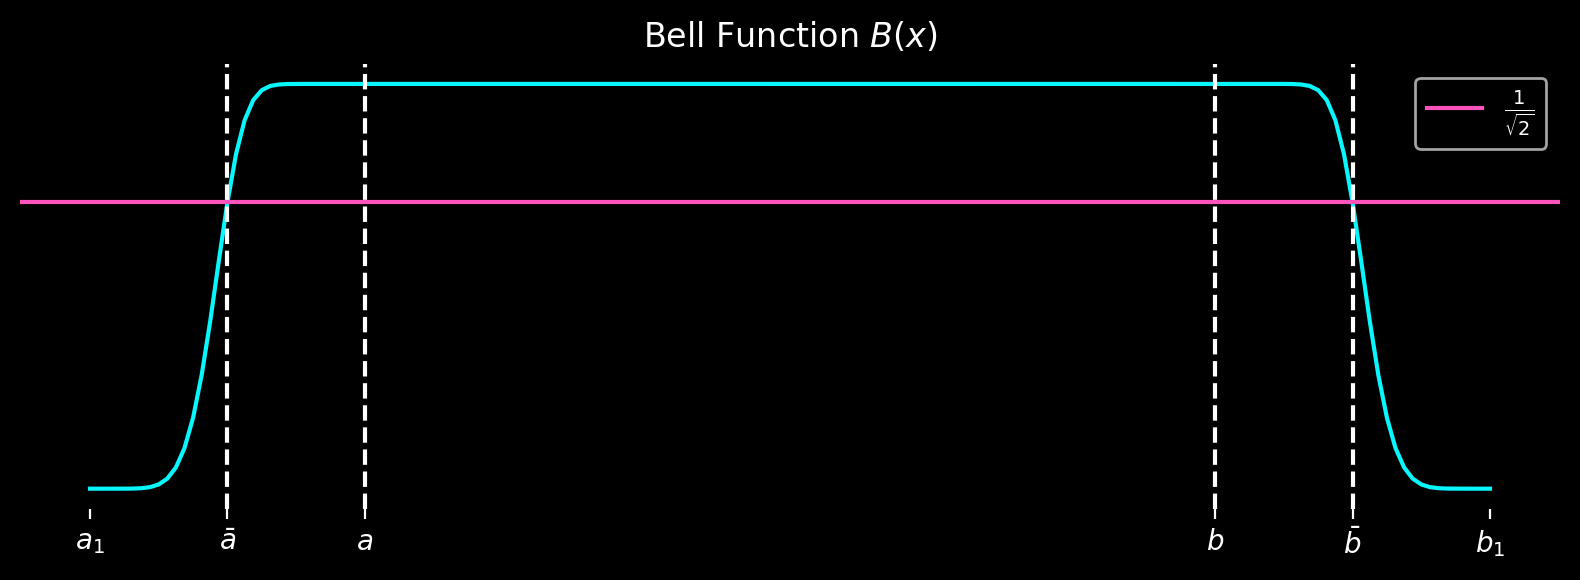

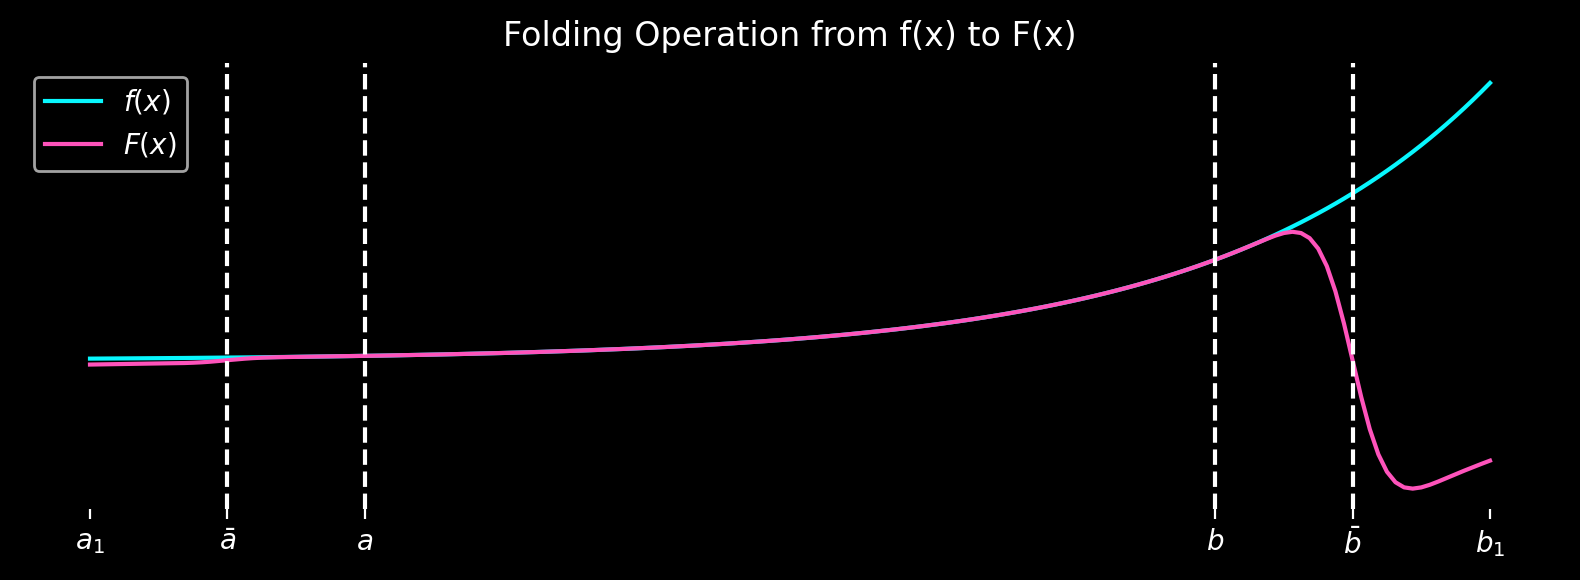

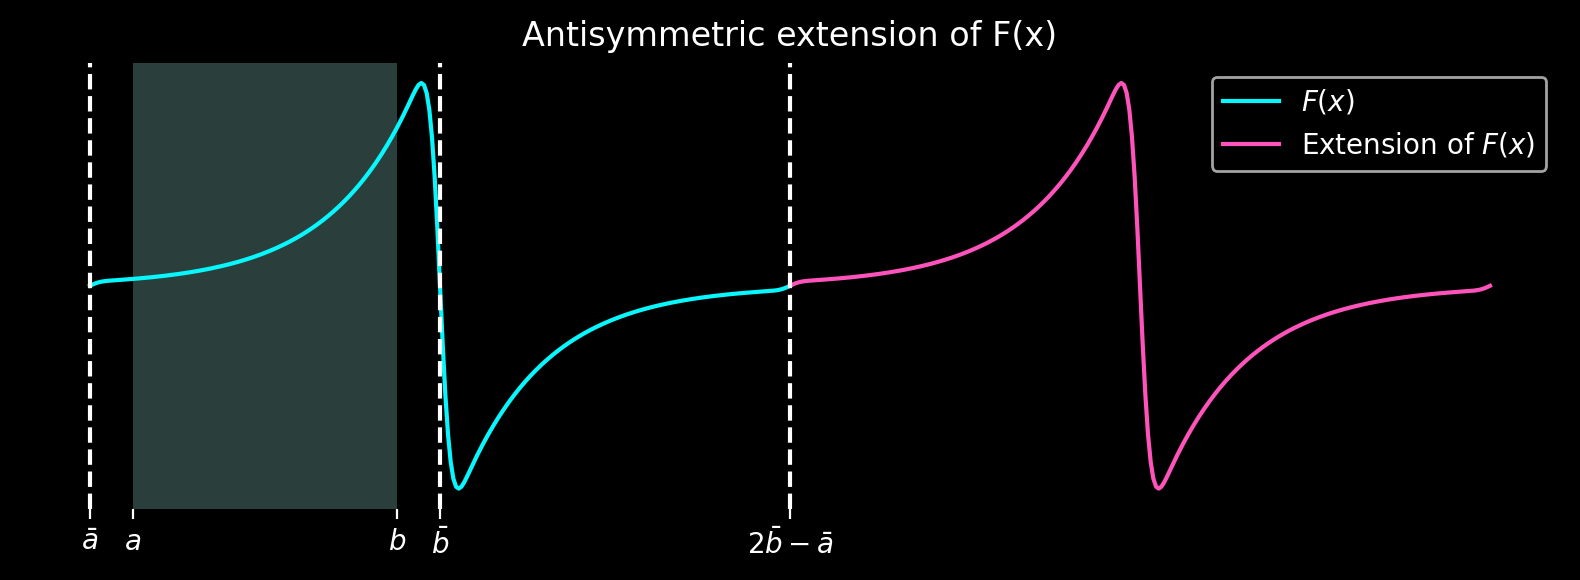

In [73]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

L                 = np.pi
N                 = 100
dx                = L/(N - 1)
ghostBoundary     = 32
x                 = np.arange(-ghostBoundary, N + ghostBoundary) * dx

def theta(x, eps):
    return np.pi/4 * ( 1 + np.sin( np.pi/2 * np.sin( np.pi/2 * np.sin ( np.pi/2 * x / eps ))))

def sfunc(x, eps):
    return np.sin(theta(x, eps))

def cfunc(x, eps):
    return np.cos(theta(x, eps))

def bfunc(x, a1, a, b1, b):
    B = np.zeros(x.shape)
    eps  = (b1 - b) / 2

    c = (x >= a1) * (x <= a)
    B[ c ] = sfunc( x[c] + eps, eps )
    c = (x >= a) *  (x <= b)
    B[ c ] = 1
    c = (x > b) * (x <= b1)
    B[ c ] = cfunc( x[c] - eps - b, eps)
    return B

a1 = - ghostBoundary * dx
a  =   0
b  =   L
b1 = + ghostBoundary * dx  + L
ab = (a + a1)/2
bb = (b + b1)/2

colors = [
    '#08F7FE',  # teal/cyan
    '#FE53BB',  # pink
    '#F5D300',  # yellow
    '#00ff41', # matrix green
]

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(8, 3), dpi=200)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_ticks([])
plt.title(r"Bell Function $B(x)$")
plt.plot(x, bfunc(x, a1, a, b1, b), c = colors[0])
plt.axhline(1/np.sqrt(2), label=r"$\frac{1}{\sqrt{2}}$", c = colors[1])
plt.axvline(a, ls="dashed")
plt.axvline(b, ls="dashed")
plt.axvline(ab, ls="dashed")
plt.axvline(bb, ls="dashed")
plt.xticks(ticks=[a1, ab, a, b, bb, b1], labels=[r"$a_1$", r"$\bar{a}$", r"$a$", r"$b$", r"$\bar{b}$", r"$b_1$", ])
plt.legend()
plt.tight_layout()
plt.savefig("figures/lfb_bell.png", bbox_inches='tight')
plt.show()

def func(x):
    return np.exp(x)

f = func(x)
B = bfunc(x, a1, a, b1, b)

def folding(x, func, bfunc):
    return bfunc(x, a1, a, b1, b) * func(x) - bfunc(2 * ab - x, a1, a, b1, b) * func(2 * ab - x) - bfunc(2 * bb - x, a1, a, b1, b) * func(2 * bb - x)

def fhat(f, B):
    return f * B - np.flip(np.roll(B * f, -ghostBoundary)) - np.roll(B * f, ghostBoundary)


fig, ax = plt.subplots(figsize=(8, 3), dpi=200)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_ticks([])
plt.title(r"Folding Operation from f(x) to F(x)")
plt.plot(x, func(x), label=r"$f(x)$", c = colors[0])
plt.plot(x, folding(x, func, bfunc), label=r"$F(x)$", c = colors[1])
plt.axvline(a, ls="dashed")
plt.axvline(b, ls="dashed")
plt.axvline(ab, ls="dashed")
plt.axvline(bb, ls="dashed")
plt.xticks(ticks=[a1, ab, a, b, bb, b1], labels=[r"$a_1$", r"$\bar{a}$", r"$a$", r"$b$", r"$\bar{b}$", r"$b_1$", ])
plt.legend()
plt.tight_layout()
plt.savefig("figures/lfb_symmetric.png", bbox_inches='tight')
plt.show()



def Ffunc(x, func, bfunc):
    Nh  = N + ghostBoundary
    Nl  =  Nh * 2 - 1
    xl  = np.arange(-ghostBoundary/2, N + ghostBoundary/2) * dx
    # Exclude left boundary since it agrees with right boundary of xl
    xh = (xl + bb - ab)[1:]
    X  = np.arange(-ghostBoundary/2, Nl-ghostBoundary/2) * dx
    F  = np.zeros(Nl)
    F[:Nh] = folding(         xl, func, bfunc)
    F[Nh:] = -folding(2 * bb - xh, func, bfunc)
    return X, F

X, F = Ffunc(x, func, bfunc)

L = 2*bb - 2*ab

fig, ax = plt.subplots(figsize=(8, 3), dpi=200)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_ticks([])
plt.title(r"Antisymmetric extension of F(x)")
plt.plot(X, F, label=r"$F(x)$", c = colors[0])
plt.plot(X + L, F, label=r"Extension of $F(x)$", c = colors[1])
plt.axvspan(a, b, alpha = 0.3)
plt.axvline(ab, ls="dashed")
plt.axvline(bb, ls="dashed")
plt.axvline(2 * bb - ab, ls="dashed")
plt.xticks(ticks=[a, b, ab, bb, 2 * bb - ab, ], labels=[r"$a$", r"$b$", r"$\bar{a}$", r"$\bar{b}$", r"$2 \bar{b} - \bar{a}$", ])
plt.legend()
plt.tight_layout()
plt.savefig("figures/lfb_extension.png", bbox_inches='tight')
plt.show()



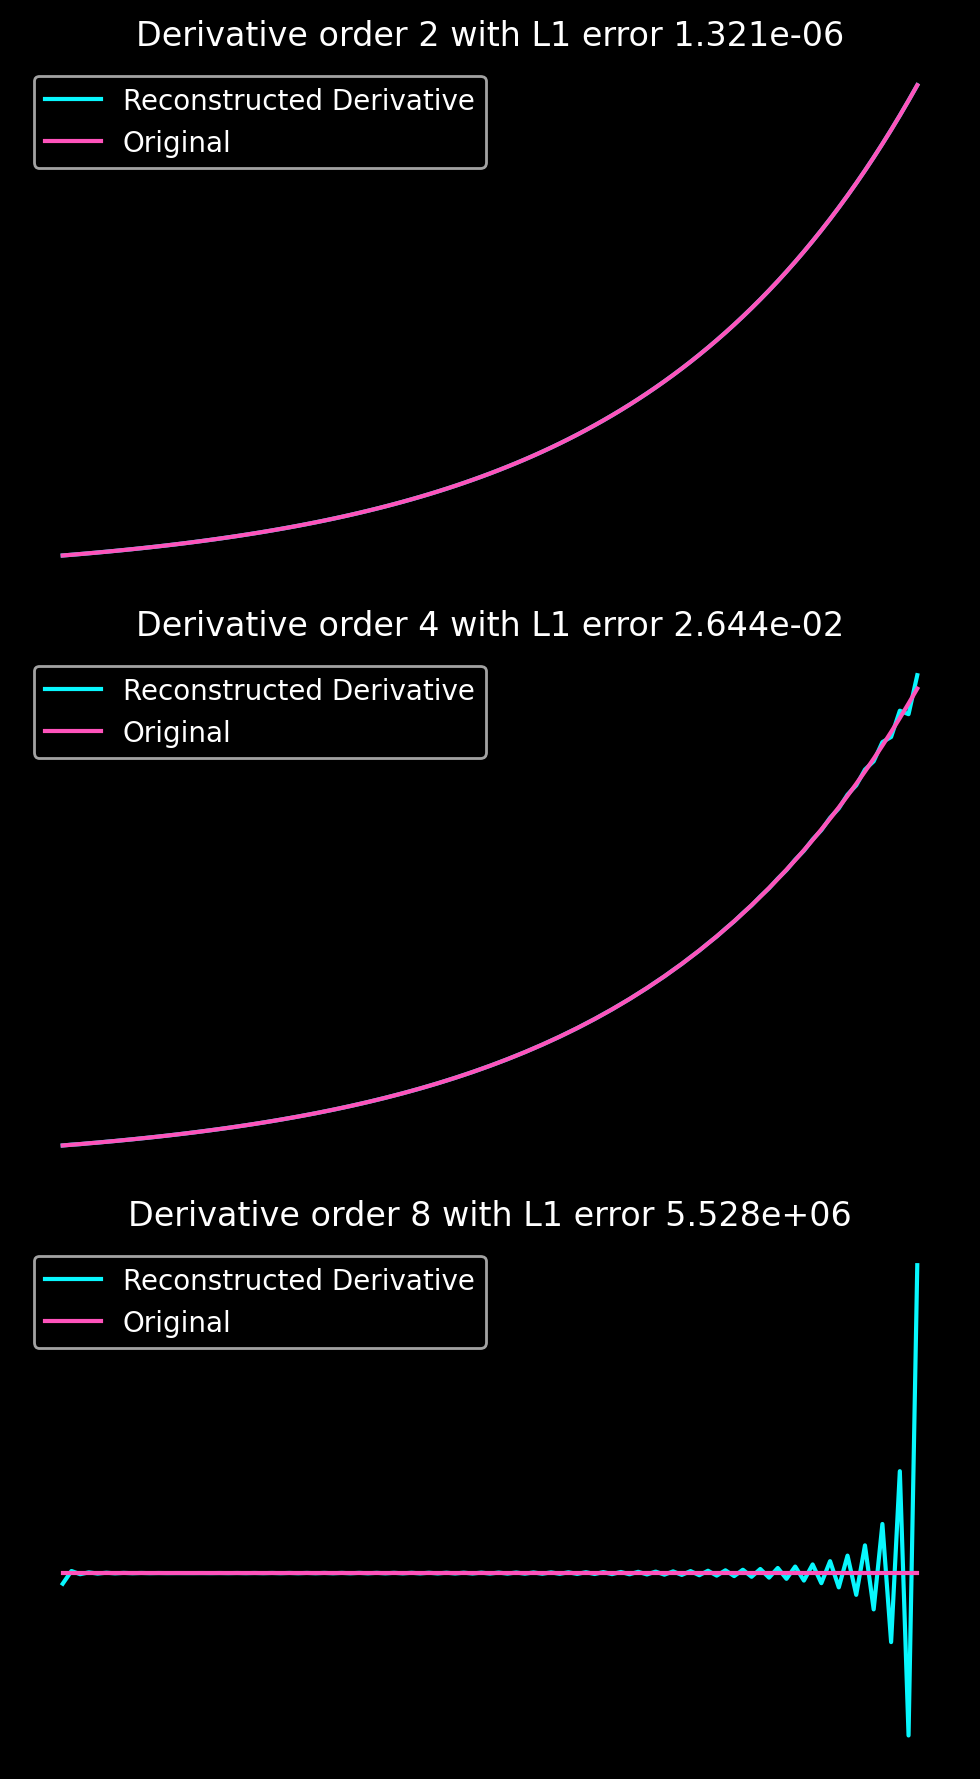

In [71]:

# Number of subplots
num_subplots = 3

# Create subplots
fig, axs = plt.subplots(num_subplots, 1,  figsize=(5 , 3* num_subplots), dpi=200)


def get_k(p, dx):
    """
    Calculate the k values for a given array and spacing.

    Args:
        p (numpy.ndarray): The input array.
        dx (float): The spacing between points.

    Returns:
        numpy.ndarray: The k values.
    """
    N = len(p)
    L = N * dx
    k = 2 * np.pi / L * np.arange(-N / 2, N / 2)
    return np.fft.ifftshift(k)


f_hat = scipy.fft.fft(F[:-1]) # F[0] = F[-1] by construction

# Get the k values
k = get_k(f_hat, dx)

s = (X[:-1]>=a) * (X[:-1]<b) # select physical domain and discard ghost boundaries

xorg = X[:-1][s]
forg = func(xorg)

# Loop through different subtraction orders
for i, o in enumerate([2, 4, 8]):
    frec = scipy.fft.ifft(f_hat * (1j * k) ** o).real  # Use only the first N elements (the original domain)
    frec = frec[s]
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['bottom'].set_visible(False)
    axs[i].spines['left'].set_visible(False)
    axs[i].get_xaxis().set_ticks([])
    axs[i].get_yaxis().set_ticks([])

    # Plot the sum and the original function in subplots
    axs[i].set_title(f"Derivative order {o} with L1 error {np.mean(np.abs(frec - forg)):3.3e}")
    axs[i].plot(xorg, frec, label="Reconstructed Derivative", c = colors[0])
    axs[i].plot(xorg, forg, label="Original", c = colors[1])
    axs[i].legend()

# Adjust layout
fig.tight_layout()
fig.savefig("figures/lfb_accuracy.png", bbox_inches='tight')
